In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
y = df.charges #outcome variable
X = df.iloc[:, :-1] #feature matrix
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((936, 8), (402, 8))

In [9]:
936/(X.shape[0])

0.6995515695067265

In [11]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

In [13]:
res = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
res["error"] = res.predicted - res.actual
res.head()

,actual,predicted,error
559,1646.4297,4610.315541,2963.885841
1087,11353.2276,12887.893880,1534.666280
1020,8798.5930,12573.948752,3775.355752
460,10381.4787,13197.836626,2816.357926
802,2103.0800,629.337182,-1473.742818


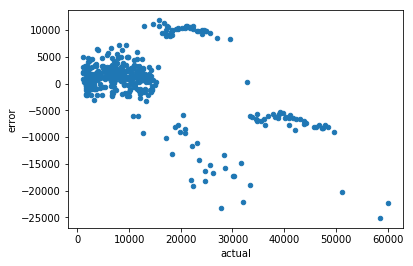

In [14]:
res.plot.scatter("actual", "error")

In [15]:
sse = np.sum(res.error ** 2) # sum of squared error

In [18]:
mse = np.mean(res.error ** 2) #mean squared error
mse

36761456.35201323

In [21]:
rmse = np.sqrt(mse)
rmse

6063.122656850447

In [23]:
rmse/np.std(y_test)

0.5093143119010878

In [24]:
sst = np.sum((np.mean(y_train) - y_test) ** 2)

In [25]:
r2 = 1 - sse/sst
r2

0.7405997304511027

In [26]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927213

In [37]:
target = "charges"
y = df[target] #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))


training r2: 0.7545557492633161 
testing r2: 0.740598931692721 
training mse: 36476790.76410686 
testing mse: 36761456.35201328


In [36]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
pd.DataFrame(scaler.transform(X_train)).describe()

,0,1,2,3,4,5,6,7
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.791065e-16,-4.635418e-16,-2.910332e-16,1.767342e-17,8.979047e-17,-1.088873e-16,4.886879e-17,-2.372271e-17
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00


In [40]:
est = pipe.steps[-1][-1]

In [41]:
est.intercept_, est.coef_

(13276.698553898505,
 array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
        9733.78688309, -129.54588605, -414.54148288, -379.09534369]))

In [42]:
pd.DataFrame({"feature": X.columns, "weight": est.coef_})

,feature,weight
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [73]:
target = "charges"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X["high_bmi"] = np.where(X.bmi > 30, "Y", "N")
X["high_age"] = np.where(X.age > 60, "Y", "N")
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.8372593719000909 
testing r2: 0.8729235927583869 
training mse: 0.13775274019670497 
testing mse: 0.10689490440059976


In [54]:
a = (np.random.ranf((4, 3)) * 10).astype(np.int)
a

array([[0, 4, 6],
       [5, 7, 5],
       [3, 9, 9],
       [4, 3, 0]])

In [56]:
pd.DataFrame(preprocessing.PolynomialFeatures(degree=2, include_bias=False).fit_transform(a))

,0,1,2,3,4,5,6,7,8
0,0.0,4.0,6.0,0.0,0.0,0.0,16.0,24.0,36.0
1,5.0,7.0,5.0,25.0,35.0,25.0,49.0,35.0,25.0
2,3.0,9.0,9.0,9.0,27.0,27.0,81.0,81.0,81.0
3,4.0,3.0,0.0,16.0,12.0,0.0,9.0,0.0,0.0


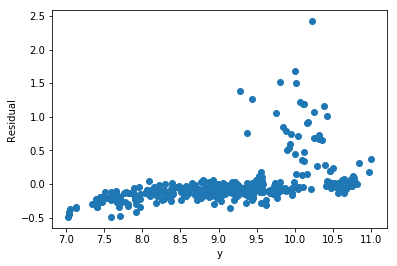

In [75]:
def plot_residuals(y, y_pred):
    plt.scatter(y, y-y_pred)
    plt.xlabel("y")
    plt.ylabel("Residual")
plot_residuals(y_test, y_test_pred)

In [68]:
import scipy as sp

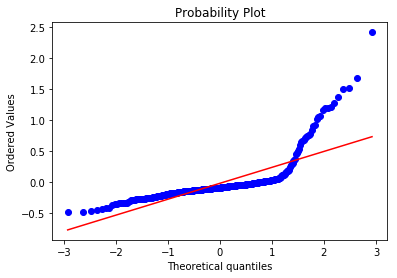

In [74]:
sp.stats.probplot(y_test-y_test_pred, dist='norm', plot=plt);